In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load your data into a DataFrame
data = pd.read_csv('cleaned_data.csv')

# Map 'Yes' to 1 and 'No' to 0 in the 'Heart_Stroke' column
data['Heart_Stroke'] = data['Heart_Stroke'].map({'Yes': 1, 'No': 0})

# Define the target variable if applicable
target = data['Heart_Stroke']

In [3]:
# Label encoding for the 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Label encoding for binary categorical columns
label_encoder = LabelEncoder()
data['BPMeds'] = label_encoder.fit_transform(data['BPMeds'])
data['prevalentStroke'] = label_encoder.fit_transform(data['prevalentStroke'])
data['prevalentHyp'] = label_encoder.fit_transform(data['prevalentHyp'])

# One-hot encoding for the 'education' column
data = pd.get_dummies(data, columns=['education'], drop_first=True)

In [4]:
# Define the features to be used for clustering
# In this example, we will use a feature selection method (SelectKBest) to choose the top K features.
# You can modify this logic based on your needs.
num_features_to_select = 2  # Set the number of features to select
features = [col for col in data.columns if col != 'Heart_Stroke']  # Exclude the target variable
X = data[features]

In [5]:
# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(X, target)
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]
selected_features

['age', 'sysBP']

In [6]:
# Prepare the data for clustering
X = data[selected_features]

In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [8]:
# Function to find the optimal K value using the Elbow Method
def find_optimal_k(data, k_range):
    distortions = []
    silhouette_scores = []
    davies_bouldin_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        
        distortions.append(kmeans.inertia_)
        
        # Calculate silhouette score
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
        
        # Calculate Davies-Bouldin score
        davies_bouldin_scores.append(davies_bouldin_score(data, kmeans.labels_))
    
    # Plot distortion (Elbow Method)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(k_range, distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion (Within-cluster Sum of Squares)')
    
    # Plot silhouette scores
    plt.subplot(1, 3, 2)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    
    # Plot Davies-Bouldin scores
    plt.subplot(1, 3, 3)
    plt.plot(k_range, davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Score')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Davies-Bouldin Score')
    
    plt.tight_layout()
    plt.show()
    
    best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    return best_k

C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

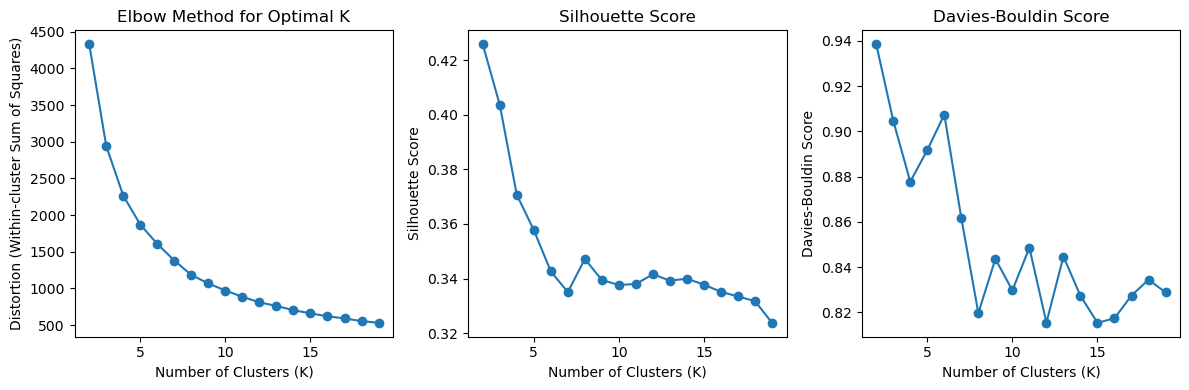

2

In [9]:
# Find the optimal K value
k_range = range(2, 20)
optimal_k = find_optimal_k(scaled_data, k_range)
optimal_k

In [10]:
# Perform K-means clustering with the optimal K value
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


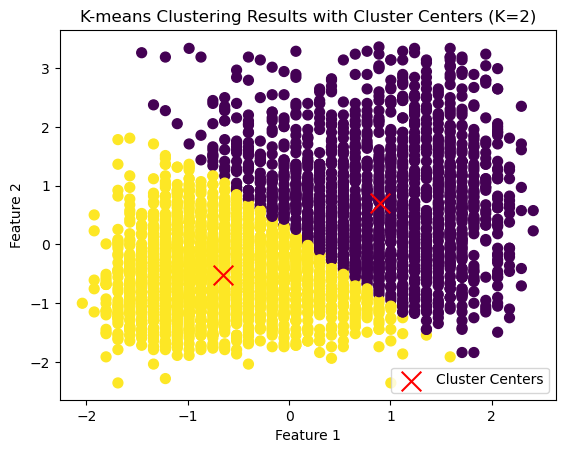

In [11]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Scatter plot with cluster centers
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-means Clustering Results with Cluster Centers (K={optimal_k})')
plt.legend()
plt.show()

In [12]:
# Print the silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Print Davies-Bouldin score
davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")

Silhouette Score: 0.4259
Davies-Bouldin Score: 0.9385


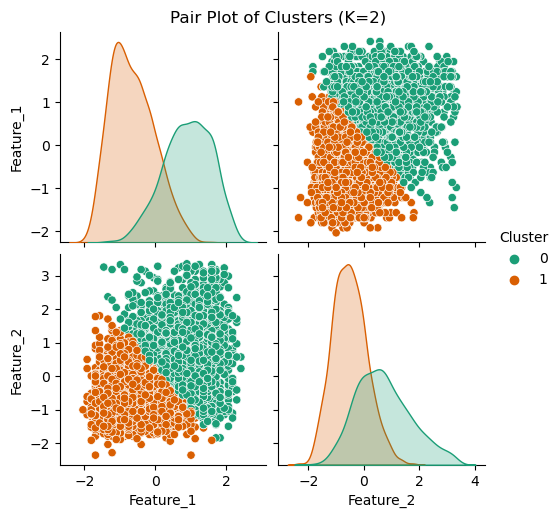

In [13]:
# Combine scaled data and cluster labels
clustered_data = pd.DataFrame(scaled_data, columns=['Feature_1', 'Feature_2'])
clustered_data['Cluster'] = cluster_labels

# Pair plot
sns.pairplot(clustered_data, hue='Cluster', palette='Dark2', diag_kind='kde')
plt.suptitle(f'Pair Plot of Clusters (K={optimal_k})', y=1.02)
plt.show()